In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("C:/Users/YuriKorin/1_IRONHACK_COURSE/COURSE/GIT/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories

In [4]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [5]:
sorted_result = crosstab_result.sort_values(by=True, ascending=False)
sorted_result[:10]

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [6]:
crosstab_result['perc'] = round(crosstab_result[True] / (crosstab_result[False] + crosstab_result[True]),2)
crosstab_result

isBestSeller,False,True,perc
category,,,
3D Printers,247,1,0.00
3D Printing & Scanning,4065,2,0.00
Abrasive & Finishing Products,245,5,0.02
Action Cameras,1696,1,0.00
Adapters,251,3,0.01
...,...,...,...
Wind Instruments,243,7,0.03
Window Treatments,234,5,0.02
Women,17559,213,0.01


In [7]:
sorted_result_perc = crosstab_result.sort_values(by='perc', ascending=False)
sorted_result_perc[:10]

isBestSeller,False,True,perc
category,,,
Smart Home Security & Lighting,98,6,0.06
Health & Personal Care,9017,552,0.06
Grocery,9008,556,0.06
Power & Hand Tools,8353,306,0.04
Mobile Phone Accessories,248,11,0.04
Home Brewing & Wine Making,239,7,0.03
Wind Instruments,243,7,0.03
"Billiard, Snooker & Pool",241,8,0.03
Bakeware,233,6,0.03


In [8]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [9]:
quart1 = np.percentile(df.price, 25)
quart3 = np.percentile(df.price, 75)

In [10]:
IQR = quart3-quart1 #range
IQR

36.0

In [11]:
df_price_filtered = df.loc[(df['price'] >= quart1-IQR) & (df['price'] >= quart3+IQR)]

In [12]:
df_price_filtered

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
10,11,B08VDNCZT9,JBL Charge 5 - Portable Bluetooth Speaker with...,4.8,11920,139.00,False,0,Hi-Fi Speakers
19,20,B07NQCKJSH,Echo Studio | Our best-sounding Wi-Fi and Blue...,4.5,14222,164.99,False,0,Hi-Fi Speakers
23,24,B09HGRXXTM,JBL Flip 6 Portable Bluetooth Speaker with 2-w...,4.7,8700,98.95,False,0,Hi-Fi Speakers
25,26,B0BLS36M5R,All-new Echo Show 8 | 3rd generation (2023 rel...,0.0,0,149.99,False,0,Hi-Fi Speakers
28,29,B096G3R7C3,JBL PartyBox110 Portable Indoor and Outdoor Pa...,4.8,153,289.00,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443627,2828568,B005QN452A,Racer Beasty Ladies Leather Motorbike Trousers,3.8,181,152.58,False,0,Motorbike Clothing
2443638,2828579,B084R261ML,"SHIMA EXO Vented, Motorbike Shoes for Women | ...",4.6,209,108.77,False,0,Motorbike Clothing
2443641,2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443643,2828586,B07JM5VQFX,Motorcycle Clothing Suit - Motorbike Suit With...,4.1,5,158.99,False,0,Motorbike Clothing


In [13]:
### **Violin Plots**:

In [14]:
violin_categorys = df.category.value_counts().sort_values(ascending=False)
vc = violin_categorys[:20]
print(vc)
vc = vc.index
print(vc)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Women                                      17772
Handmade Home & Kitchen Products           17435
Handmade Kitchen & Dining                  17432
Men                                        17417
Baby                                       15050
Name: count

In [15]:
df_price_filtered_20 =  df_price_filtered.loc[(df['category'].isin(vc))]
df_price_filtered_20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
20028,21587,B0BDVV8WNV,Rustic Console Table | 22.5cm Deep Handcrafted...,4.5,7,87.99,False,0,Handmade Home & Kitchen Products
20154,21713,B0BXFL86R3,Console Table | Narrow 20cm Deep Handcrafted H...,0.0,0,87.99,False,0,Handmade Home & Kitchen Products
20245,21804,B0BGMHFNML,"Rustic Wooden Bar, Pallet Bar, Garden Bar, Man...",3.5,18,149.99,False,0,Handmade Home & Kitchen Products
20634,22211,B076B2JWQG,"Black Grave Marker, Memorial Marker, Cemetery ...",5.0,16,99.95,False,0,Handmade Home & Kitchen Products
21464,23107,B01MPZZF3Q,Rustic Wooden Chest Trunk,5.0,39,249.00,False,0,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2397645,2767910,B0CGLP4KKS,DYNAFIT Women's Mezzalama PTC Alpha VST W Vest...,0.0,0,176.51,False,0,Sports & Outdoors
2397648,2767913,B0CG9J8GXD,HEAD Rebels Vest Women,0.0,0,198.21,False,0,Sports & Outdoors
2397649,2767914,B0CCYYLJC8,G.I.G.A. DX Women's Quilted Hood/Functional Ve...,0.0,0,96.43,False,0,Sports & Outdoors
2397650,2767915,B0C1WN8N87,Craft Women's ski vest Adv Nordic Club,0.0,0,103.45,False,0,Sports & Outdoors


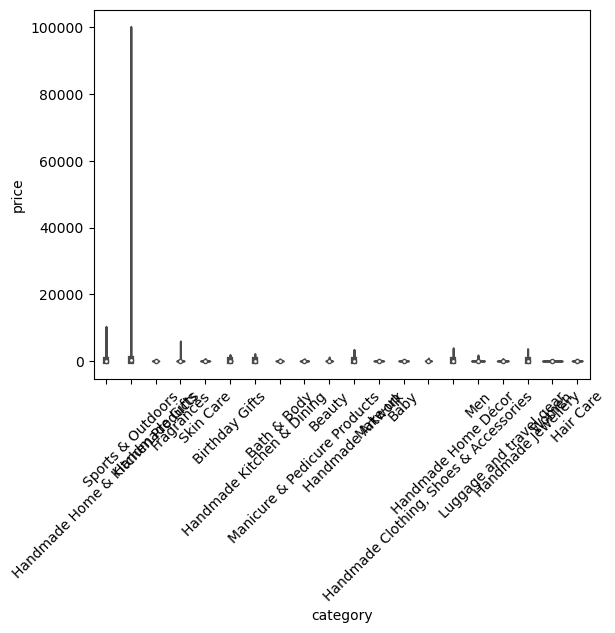

In [16]:
sns.violinplot(data=df_price_filtered_20, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

In [17]:
df_cat = df_price_filtered[['category', 'price']]
df_cat
cat_med = round(df_cat.groupby(['category']).median('price'),2)
cat_med.reset_index(inplace=True)
cat_med

,category,price
0,3D Printers,384.99
1,3D Printing & Scanning,196.99
2,Abrasive & Finishing Products,118.29
3,Action Cameras,179.99
4,Agricultural Equipment & Supplies,116.10
...,...,...
285,Wind Instruments,453.44
286,Window Treatments,115.20
287,Women,105.88
288,Women's Sports & Outdoor Shoes,114.72


In [18]:
cat_med_sorted = cat_med.sort_values(by='price', ascending=False, ignore_index=True)
cat_med_sorted

,category,price
0,Laptops,1049.00
1,Desktop PCs,829.97
2,Home Brewing & Wine Making,749.99
3,"Billiard, Snooker & Pool",699.99
4,Digital Cameras,664.66
...,...,...
285,"Motorbike Handlebars, Controls & Grips",90.72
286,Torches,89.00
287,Boxing Shoes,88.00
288,Bathroom Linen,87.57


In [19]:
### **Bar Charts**:

In [20]:
bar_categorys = df.category.value_counts().sort_values(ascending=False)
bc = violin_categorys[:10]
bc = bc.index

In [21]:
df_filtered_10 =  df_price_filtered.loc[(df['category'].isin(bc))]

In [22]:
df_filtered_10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82170,89490,B0CF3VVTLG,GoPro HERO12 Black - Waterproof Action Camera ...,4.1,41,399.00,False,0,Sports & Outdoors
82187,89507,B0C783J9WC,DJI Osmo Action 4 Adventure Combo - 4K/120fps ...,4.3,68,469.00,False,0,Sports & Outdoors
82192,89512,B0BBP8N2MX,GoPro HERO11 Black Accessory Bundle - Includes...,4.6,573,399.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2397645,2767910,B0CGLP4KKS,DYNAFIT Women's Mezzalama PTC Alpha VST W Vest...,0.0,0,176.51,False,0,Sports & Outdoors
2397648,2767913,B0CG9J8GXD,HEAD Rebels Vest Women,0.0,0,198.21,False,0,Sports & Outdoors
2397649,2767914,B0CCYYLJC8,G.I.G.A. DX Women's Quilted Hood/Functional Ve...,0.0,0,96.43,False,0,Sports & Outdoors
2397650,2767915,B0C1WN8N87,Craft Women's ski vest Adv Nordic Club,0.0,0,103.45,False,0,Sports & Outdoors


In [23]:
pf10 = df_filtered_10[['category', 'price']]
pf10

,category,price
82165,Sports & Outdoors,199.00
82166,Sports & Outdoors,249.99
82170,Sports & Outdoors,399.00
82187,Sports & Outdoors,469.00
82192,Sports & Outdoors,399.99
...,...,...
2397645,Sports & Outdoors,176.51
2397648,Sports & Outdoors,198.21
2397649,Sports & Outdoors,96.43
2397650,Sports & Outdoors,103.45


In [24]:
cat_avg = round(pf10.groupby(['category']).mean('price'),2).reset_index()
cat_avg

,category,price
0,Bath & Body,144.45
1,Beauty,146.55
2,Birthday Gifts,236.19
3,Fragrances,128.63
4,Hair Care,137.74
5,"Handmade Clothing, Shoes & Accessories",170.46
6,Make-up,136.03
7,Manicure & Pedicure Products,130.83
8,Skin Care,137.16
9,Sports & Outdoors,557.05


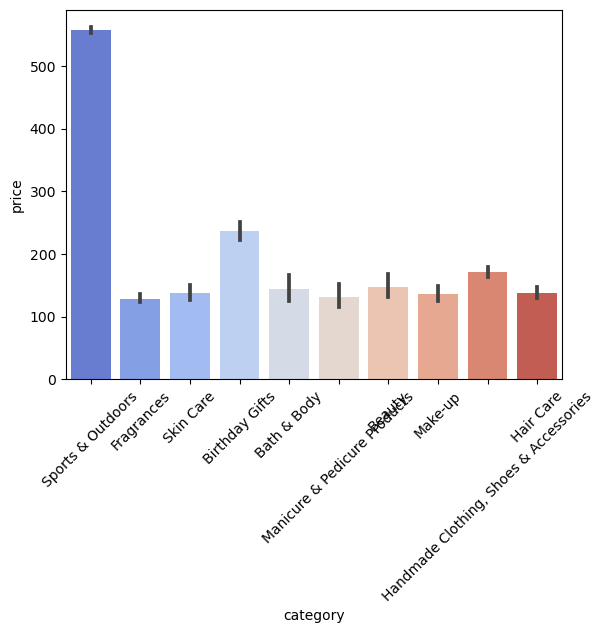

In [25]:
sns.barplot(data=pf10, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

In [26]:
df_cat = df_price_filtered[['category', 'price']]
df_cat

,category,price
10,Hi-Fi Speakers,139.00
19,Hi-Fi Speakers,164.99
23,Hi-Fi Speakers,98.95
25,Hi-Fi Speakers,149.99
28,Hi-Fi Speakers,289.00
...,...,...
2443627,Motorbike Clothing,152.58
2443638,Motorbike Clothing,108.77
2443641,Motorbike Clothing,166.99
2443643,Motorbike Clothing,158.99


In [27]:
cat_mean = round(df_cat.groupby(['category']).mean('price'),2)
cat_mean.reset_index(inplace=True)
cat_mean[:1]

,category,price
0,3D Printers,1127.78


In [28]:
###**Box Plots**:

In [29]:
bc

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances'],
      dtype='object', name='category')

In [30]:
df_filtered_10 =  df_price_filtered.loc[(df['category'].isin(bc))]
df_filtered_10 = df_filtered_10[['stars', 'category']]
df_filtered_10

,stars,category
82165,4.5,Sports & Outdoors
82166,4.4,Sports & Outdoors
82170,4.1,Sports & Outdoors
82187,4.3,Sports & Outdoors
82192,4.6,Sports & Outdoors
...,...,...
2397645,0.0,Sports & Outdoors
2397648,0.0,Sports & Outdoors
2397649,0.0,Sports & Outdoors
2397650,0.0,Sports & Outdoors


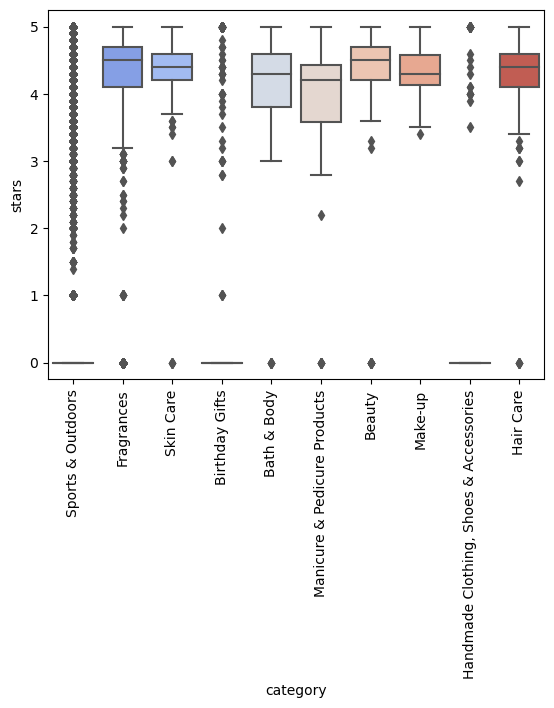

In [31]:
sns.boxplot(data=df_filtered_10, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [32]:
cat_med_stars = round(df_filtered_10.groupby(['category']).median('stars'),2).reset_index()
cat_med_stars 

,category,stars
0,Bath & Body,4.3
1,Beauty,4.5
2,Birthday Gifts,0.0
3,Fragrances,4.5
4,Hair Care,4.4
5,"Handmade Clothing, Shoes & Accessories",0.0
6,Make-up,4.3
7,Manicure & Pedicure Products,4.2
8,Skin Care,4.4
9,Sports & Outdoors,0.0


In [34]:
df_stars = df_price_filtered[['category','stars']]

In [37]:
med_stars = round(df_stars.groupby(['category']).median('stars'),2).reset_index()

In [40]:
med_stars.sort_values(by='stars', ascending=False)

,category,stars
31,Boxes & Organisers,4.80
170,Luxury Food & Drink,4.75
256,Soft Toys,4.70
34,Building & Construction Toys,4.70
154,Kids' Play Figures,4.70
...,...,...
191,Motorbike Chassis,0.00
190,Motorbike Brakes,0.00
189,Motorbike Boots & Luggage,0.00
188,Motorbike Batteries,0.00
